# Run sorters

In [1]:
import spikeinterface.full as si
from pathlib import Path

In [2]:
si.set_global_job_kwargs(n_jobs=-1, chunk_duration="1s", progress_bar=True)

In [3]:
# For sam local machine
base_data_folder = Path("/data_local/DataSpikeSorting/data_lyon_cns_2025/raw_datas/")
working_folder = Path("/data_local/DataSpikeSorting/data_lyon_cns_2025/results")
recording_name = "M25_D23_2024-11-11_13-11-10_OF1"


In [4]:
results_folder = working_folder / recording_name

### Reload previous preprocessing

In [5]:
preprocess_folder = results_folder / "preprocessed"
if not preprocess_folder.is_dir():
    # in case the preprocessing is not done
    # lets do a quick one
    oe_folder = base_data_folder / recording_name
    full_raw_rec = si.read_openephys(oe_folder)
    full_raw_rec
    recording_f = si.bandpass_filter(full_raw_rec, freq_min=250., freq_max=6000.)
    recording_cmr = si.common_reference(recording_f, reference='global', operator='median')
    rec_preprocessed = recording_cmr
    print(rec_preprocessed)    
    recording_saved = rec_preprocessed.save(folder=preprocess_folder)
recording_saved = si.load(preprocess_folder)
recording_saved

BinaryFolderRecording: 384 channels - 30.0kHz - 1 segments - 29,363,947 samples 
                       978.80s (16.31 minutes) - int16 dtype - 21.00 GiB

In [6]:
# %matplotlib widget
# si.plot_traces(recording_saved, backend="ipywidgets")

### Check installation

We can now run spike sorting on the above recording. We will use different spike sorters for this demonstration, to show how easy SpikeInterface makes it easy to interchengably run different sorters :)

Let's first check the available and installed sorters in `SpikeInterface`.
We will sort the bandpass cached filtered recording the `recording_saved` object.

In [6]:
si.available_sorters()

['combinato',
 'hdsort',
 'herdingspikes',
 'ironclust',
 'kilosort',
 'kilosort2',
 'kilosort2_5',
 'kilosort3',
 'kilosort4',
 'kilosort4like',
 'lupin',
 'mountainsort4',
 'mountainsort5',
 'pykilosort',
 'rtsort',
 'simple',
 'spykingcircus',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2',
 'waveclus',
 'waveclus_snippets',
 'yass']

In [7]:
si.installed_sorters()

['kilosort4',
 'kilosort4like',
 'lupin',
 'simple',
 'spykingcircus2',
 'tridesclous2']

The `spikeinterface.sortingcomponents` module includes functions that can be used to create custom spike sorting pipelines built-in in `SpikeInterface`. It is still experimental and under heavy development, but there are already 3  SI-based sorters available:

* `tridesclous2` (developed by Samuel Garcia)
* `spykingcircus2` (developed by Pierre Yger)
* `simple` which is only for demo and teaching

They can be run with the same `run_sorter` function, but they don't require any additional installation!

In [9]:
si.run_sorter?

Signature:
si.run_sorter(
    sorter_name: 'str',
    recording: 'BaseRecording | dict',
    folder: 'Optional[str]' = None,
    remove_existing_folder: 'bool' = False,
    delete_output_folder: 'bool' = False,
    verbose: 'bool' = False,
    raise_error: 'bool' = True,
    docker_image: 'Optional[Union[bool, str]]' = False,
    singularity_image: 'Optional[Union[bool, str]]' = False,
    delete_container_files: 'bool' = True,
    with_output: 'bool' = True,
    **sorter_params,
)
Docstring:
Generic function to run a sorter via function approach.

Parameters
----------
sorter_name : str
    The sorter name
recording : RecordingExtractor | dict of RecordingExtractor
    The recording extractor to be spike sorted
folder : str or Path
    Path to output folder
remove_existing_folder : bool
    If True and folder exists then delete.
delete_output_folder : bool, default: False
    If True, output folder is deleted
verbose : bool, default: False
    If True, output is verbose
raise_error : 

In [10]:
si.get_default_sorter_params('kilosort4')

{'batch_size': 60000,
 'nblocks': 1,
 'Th_universal': 9,
 'Th_learned': 8,
 'nt': 61,
 'shift': None,
 'scale': None,
 'artifact_threshold': inf,
 'nskip': 25,
 'whitening_range': 32,
 'highpass_cutoff': 300,
 'binning_depth': 5,
 'sig_interp': 20,
 'drift_smoothing': [0.5, 0.5, 0.5],
 'nt0min': None,
 'dmin': None,
 'dminx': 32,
 'min_template_size': 10,
 'template_sizes': 5,
 'nearest_chans': 10,
 'nearest_templates': 100,
 'max_channel_distance': 32,
 'max_peels': 100,
 'templates_from_data': True,
 'n_templates': 6,
 'n_pcs': 6,
 'Th_single_ch': 6,
 'acg_threshold': 0.2,
 'ccg_threshold': 0.25,
 'cluster_neighbors': 10,
 'cluster_downsampling': 1,
 'max_cluster_subset': 25000,
 'x_centers': None,
 'duplicate_spike_ms': 0.25,
 'position_limit': 100,
 'do_CAR': True,
 'invert_sign': False,
 'save_extra_vars': False,
 'save_preprocessed_copy': False,
 'torch_device': 'auto',
 'bad_channels': None,
 'clear_cache': False,
 'do_correction': True,
 'skip_kilosort_preprocessing': False,
 '

### Run sorter installed locally

This run a sorter which is installed in the current python environements.

In [11]:
sorter_params = {'do_correction': False}

In [ ]:
sorting_KS4 = si.run_sorter(
    'kilosort4', recording_saved,
    folder=results_folder / 'sorter_KS4',
    verbose=True,
    **sorter_params
)

kilosort.run_kilosort:  
kilosort.run_kilosort: Computing preprocessing variables.
kilosort.run_kilosort: ----------------------------------------
kilosort.run_kilosort: N samples: 29363947
kilosort.run_kilosort: N seconds: 978.7982333333333
kilosort.run_kilosort: N batches: 490


kilosort.run_kilosort: Preprocessing filters computed in 1.54s; total 1.54s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after preprocessing
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     3.10 %
kilosort.run_kilosort: Mem used:      7.10 %     |       4.46 GB
kilosort.run_kilosort: Mem avail:    58.08 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   58.38 %     |      4.55   /     7.79 GB
kilosort.run_kilosort: Allocated:    23.89 %     |      1.86   /     7.79 GB
kilosort.run_kilosort: Max alloc:    40.56 %     |      3.16   /     7.79 GB
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort:  
kilosort.run_kilosort: Computing drift correction.
kilosort.run_kilosort: -----------------------------------

Skipping drift correction.


kilosort.spikedetect: Number of universal templates: 1149
kilosort.spikedetect: Detecting spikes...
100%|██████████| 490/490 [05:48<00:00,  1.40it/s]
kilosort.run_kilosort: 2148040 spikes extracted in 352.81s; total 354.49s
kilosort.run_kilosort:  
kilosort.run_kilosort: Resource usage after spike detect (univ)
kilosort.run_kilosort: ********************************************************
kilosort.run_kilosort: CPU usage:     0.00 %
kilosort.run_kilosort: Mem used:      8.90 %     |       5.57 GB
kilosort.run_kilosort: Mem avail:    56.97 / 62.54 GB
kilosort.run_kilosort: ------------------------------------------------------
kilosort.run_kilosort: GPU usage:    `conda install pynvml` for GPU usage
kilosort.run_kilosort: GPU memory:   86.57 %     |      6.74   /     7.79 GB
kilosort.run_kilosort: Allocated:    23.91 %     |      1.86   /     7.79 GB
kilosort.run_kilosort: Max alloc:    57.65 %     |      4.49   /     7.79 GB
kilosort.run_kilosort: *************************************

kilosort4 run time 657.17s


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(


In [11]:
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
sorting_KS4

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(


KiloSortSortingExtractor: 260 units - 1 segments - 30.0kHz

## internal sorter : tridesclous2

In [13]:
si.get_default_sorter_params('tridesclous2')

{'apply_preprocessing': True,
 'apply_motion_correction': False,
 'motion_correction': {'preset': 'dredge_fast'},
 'cache_preprocessing': {'mode': 'memory',
  'memory_limit': 0.5,
  'delete_cache': True},
 'waveforms': {'ms_before': 0.5, 'ms_after': 1.5, 'radius_um': 120.0},
 'filtering': {'freq_min': 150.0,
  'freq_max': 6000.0,
  'ftype': 'bessel',
  'filter_order': 2},
 'detection': {'peak_sign': 'neg',
  'detect_threshold': 5,
  'exclude_sweep_ms': 1.5,
  'radius_um': 150.0},
 'selection': {'n_peaks_per_channel': 5000, 'min_n_peaks': 20000},
 'svd': {'n_components': 5},
 'clustering': {'recursive_depth': 3},
 'templates': {'ms_before': 2.0,
  'ms_after': 3.0,
  'max_spikes_per_unit': 400,
  'sparsity_threshold': 1.5,
  'min_snr': 2.5},
 'matching': {'method': 'tdc-peeler',
  'method_kwargs': {},
  'gather_mode': 'memory'},
 'job_kwargs': {},
 'save_array': True,
 'debug': False}

In [14]:
sorter_params = {
    "apply_motion_correction": False,
    
}

sorting_TDC2 = si.run_sorter('tridesclous2', recording_saved,
                             folder= results_folder / 'sorter_TDC2',
                             verbose=True, **sorter_params)

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:423: UserWarning: Recording too large to be preloaded in RAM...
  warnings.warn("Recording too large to be preloaded in RAM...")


detect peaks (locally_exclusive) (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

detect_peaks(): 948016 peaks found
select_peaks(): 948016 peaks kept for clustering


Fit peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

Transform peaks svd (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

find_clusters_from_peaks(): 139 cluster found


estimate_templates_with_accumulator (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

find spikes (tdc-peeler) (workers: 40 processes):   0%|          | 0/979 [00:00<?, ?it/s]

tridesclous2 run time 377.41s


In [12]:
sorting_TDC2 = si.load(results_folder / 'sorter_TDC2')
sorting_TDC2

NumpyFolder (NumpyFolderSorting): 139 units - 1 segments - 30.0kHz

## internal skyking-circus2 (by Pierre Yger)

In [ ]:
si.set_global_job_kwargs(n_jobs=30, chunk_duration="0.2s", progress_bar=True)

sorter_params = {
    "apply_motion_correction": False,
}
sorting_SC2 = si.run_sorter('spykingcircus2', recording_saved,
                             folder=results_folder / 'sorter_SC2',
                             verbose=True, **sorter_params)

Preprocessing the recording (bandpass filtering + CMR + whitening)


noise_level (workers: 20 processes):   0%|          | 0/20 [00:00<?, ?it/s]

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/sortingcomponents/tools.py:400: UserWarning: Recording too large to be preloaded in RAM...
  warnings.warn("Recording too large to be preloaded in RAM...")


get protoype waveforms (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

detect peaks (matched_filtering) 
engine=process - n_jobs=30 - samples_per_chunk=6,000 - chunk_memory=8.79 MiB - total_memory=263.67 MiB - chunk_duration=0.20s (200.00 ms)


detect peaks (matched_filtering) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Kept 1446076 peaks for clustering


Fit peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Transform peaks svd (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/384 [00:00<?, ?it/s]

Kept 119 clean clusters
find spikes (circus-omp) 
engine=process - n_jobs=30 - samples_per_chunk=6,000 - chunk_memory=8.79 MiB - total_memory=263.67 MiB - chunk_duration=0.20s (200.00 ms)


find spikes (circus-omp) (workers: 30 processes):   0%|          | 0/4894 [00:00<?, ?it/s]

Found 2089135 spikes
Kept 119 units after final merging
spykingcircus2 run time 819.84s


In [13]:
sorting_SC2 = si.load(results_folder / 'sorter_SC2')
sorting_SC2

NumpyFolder (NumpyFolderSorting): 119 units - 1 segments - 30.0kHz

### Run sorter in container

Some sorters are hard to install! To alleviate this headache, SI provides a built-in mechanism to run a spike sorting job in a docker container.

We are maintaining a set of sorter-specific docker files in the [spikeinterface-dockerfiles repo](<https://github.com/SpikeInterface/spikeinterface-dockerfiles>)
and most of the docker images are available on Docker Hub from the [SpikeInterface organization](<https://hub.docker.com/orgs/spikeinterface/repositories>).

Running spike sorting in a docker container just requires to:

1. have docker/singularity installed
2. have docker/singularity python SDK installed (`pip install docker/spython`)

When docker/singularity is installed, you can simply run the sorter in a container image:



In [ ]:
sorter_params = {'do_correction': False}
sorting_KS25 = si.run_sorter('kilosort2_5', recording_saved, 
                            folder=results_folder / 'sorter_KS25',
                            verbose=True,
                            singularity_image=True, 
                            **sorter_params
                            )


installation_mode='auto' switching to installation_mode: 'dev'
Starting container
Installing spikeinterface with folder in container
Running kilosort2_5 sorter inside spikeinterface/kilosort2_5-compiled-base
Stopping container


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


In [14]:
sorting_KS25 = si.load(results_folder / 'sorter_KS25')
sorting_KS25

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


KiloSortSortingExtractor: 238 units - 1 segments - 30.0kHz

## Using the Sorting object

Siimilarly to recording we have properties and annotations

In [15]:
# lets reload everything from the out folder of sorters
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
sorting_KS25 = si.load(results_folder / 'sorter_KS25')
sorting_SC2 = si.load(results_folder / 'sorter_SC2')
sorting_TDC2 = si.load(results_folder / 'sorter_TDC2')

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(
/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


In [18]:
sorting_KS4

KiloSortSortingExtractor: 260 units - 1 segments - 30.0kHz

**Retrieve spiketrains**

In [19]:
# spike times in frame
spike_times = sorting_KS4.get_unit_spike_train(12)
print(spike_times)

# spike times in seconds
spike_times = sorting_KS4.get_unit_spike_train(12, return_times=True)
print(spike_times)


[    1319    30264    30859 ... 29308577 29308863 29309202]
[  92.28513333   93.24996667   93.2698     ... 1069.19373333 1069.20326667
 1069.21456667]


**process the sorting object**

Similar to recording we can apply a chain

In [20]:
sorting_KS4 = si.load(results_folder / 'sorter_KS4')
# in KS some spikes can be ouside
sorting_KS4 = si.remove_excess_spikes(sorting_KS4, recording_saved)
sorting_KS4

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:316: UserWarning: Some spikes exceed the recording's duration! Removing these excess spikes with `spikeinterface.curation.remove_excess_spikes()` Might be necessary for further postprocessing.
  warnings.warn(


RemoveExcessSpikesSorting: 260 units - 1 segments - 30.0kHz

In [21]:
sorting_KS25 = si.load( results_folder / 'sorter_KS25')
sorting_KS25 = si.remove_excess_spikes(sorting_KS25, recording_saved)
sorting_KS25

/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.103.1 is recommended
  warnings.warn(


KiloSortSortingExtractor: 238 units - 1 segments - 30.0kHz

In [22]:
# time slice
sorting_KS4.frame_slice(0, 30_000)

FrameSliceSorting: 260 units - 1 segments - 30.0kHz

**save to internal format**

In [24]:
sorting_KS4.save(folder=results_folder / "sorting_KS4")
sorting_KS25.save(folder=results_folder / "sorting_KS25")
sorting_SC2.save(folder=results_folder / "sorting_SC2")
sorting_TDC2.save(folder=results_folder / "sorting_TDC2")


/home/samuel.garcia/Documents/SpikeInterface/spikeinterface/src/spikeinterface/core/basesorting.py:380: UserWarning: The registered recording will not be persistent on disk, but only available in memory
  warnings.warn("The registered recording will not be persistent on disk, but only available in memory")


NumpyFolder (NumpyFolderSorting): 139 units - 1 segments - 30.0kHz

**and reload**

In [23]:
sorting_KS4 = si.load(results_folder / "sorting_KS4")
sorting_KS4

NumpyFolder (NumpyFolderSorting): 260 units - 1 segments - 30.0kHz

**plots**

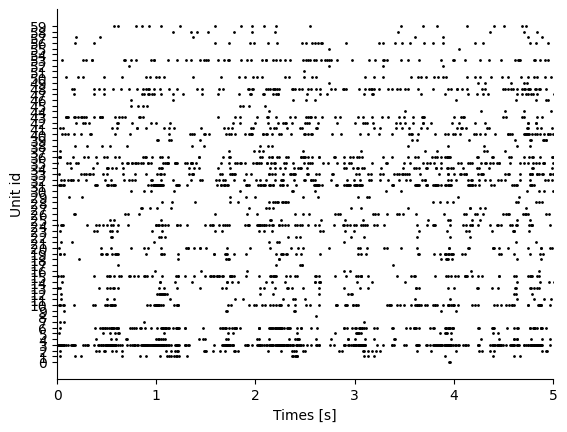

In [24]:
si.plot_rasters(sorting_KS4, unit_ids=sorting_KS4.unit_ids[:60], time_range=(0, 5))

### compare sorter outputs

In [29]:
# comp = si.compare_two_sorters(sorting_KS4, sorting_TDC2, 'KS4', 'TDC2')
comp = si.compare_two_sorters(sorting_KS4, sorting_KS25, 'KS4', 'KS25')
# comp = si.compare_two_sorters(sorting_SC2, sorting_TDC2, 'SC2', 'TDC2')
# comp = si.compare_two_sorters(sorting_SC2, sorting_KS4, 'SC2', 'KS4')
comp

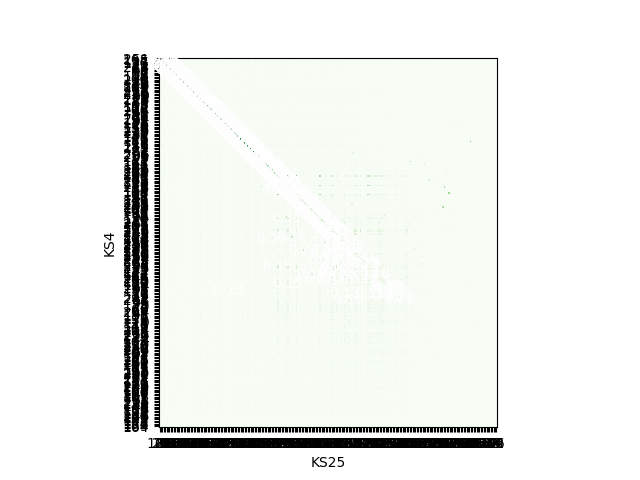

In [30]:
# %matplotlib inline
%matplotlib widget
w = si.plot_agreement_matrix(comp)

**multiple comparison at once**

In [32]:
multi_comp = si.compare_multiple_sorters(
    sorting_list=[sorting_KS4, sorting_TDC2, sorting_KS25, sorting_SC2],
    name_list=['KS4', 'TDC2', 'KS25', 'SC2'],
    spiketrain_mode='union',
    verbose=True
)

Multicomparison step 1: pairwise comparison
Multicomparison step 2: make graph
Multicomparison step 3: clean graph
Removed 0 duplicate nodes
Multicomparison step 4: extract agreement from graph


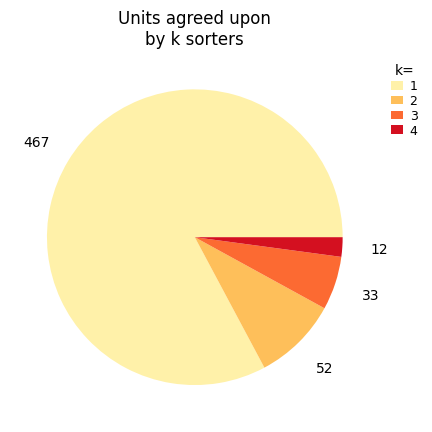

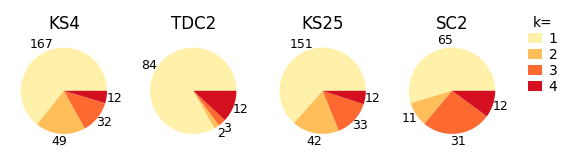

In [33]:
w = si.plot_multicomparison_agreement(multi_comp)
w = si.plot_multicomparison_agreement_by_sorter(multi_comp)